In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [4]:
df = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.shape

(51717, 17)

In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [10]:
df.drop_duplicates(inplace = True)
df.shape

(51609, 11)

# Cleaning Rate Column

In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
def handlerate(value):
    if (value == 'NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [13]:
df["rate"] = df["rate"].apply(handlerate)


In [14]:
df.sort_values(by=["rate"]).rate.unique()

array([1.8, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1,
       3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4,
       4.5, 4.6, 4.7, 4.8, 4.9, nan])

In [15]:
df.rate.isnull().sum() # How much nan is there

10019

# Filling Null Values in Rate Column with Mean

In [16]:
df["rate"].fillna(df["rate"].mean())
df["rate"].isnull().sum()

10019

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         41590 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


# Dropping Null Values

In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41190 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41190 non-null  object 
 1   online_order                 41190 non-null  object 
 2   book_table                   41190 non-null  object 
 3   rate                         41190 non-null  float64
 4   votes                        41190 non-null  int64  
 5   location                     41190 non-null  object 
 6   rest_type                    41190 non-null  object 
 7   cuisines                     41190 non-null  object 
 8   approx_cost(for two people)  41190 non-null  object 
 9   listed_in(type)              41190 non-null  object 
 10  listed_in(city)              41190 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.8+ MB


In [20]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# Renaming columns

In [21]:
df.rename(columns = {"approx_cost(for two people)":"costof2plates","listed_in(type)":"type"},inplace=True)

In [22]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costof2plates,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [23]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramangala 6th Block', 'Ma

In [24]:
df["listed_in(city)"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

# We only keep one location

In [25]:
df = df.drop(["listed_in(city)"],axis=1)

In [26]:
df["costof2plates"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

# removing commas and making them float

In [27]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(",","")
        return float(value)
    else:
        return float(value)

In [28]:
df["costof2plates"] = df["costof2plates"].apply(handlecomma)

In [29]:
df["costof2plates"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

In [30]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costof2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# Cleanin Rest Type Column

In [31]:
df["rest_type"].value_counts()

rest_type
Quick Bites                   13861
Casual Dining                  9597
Cafe                           3365
Dessert Parlor                 1848
Delivery                       1666
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64

In [32]:
rest_types = df["rest_type"].value_counts(ascending = False)
rest_types

rest_type
Quick Bites                   13861
Casual Dining                  9597
Cafe                           3365
Dessert Parlor                 1848
Delivery                       1666
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64

In [33]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Bakery                        704
Bar                           640
Beverage Shop                 638
Food Court                    496
Bar, Casual Dining            381
                             ... 
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Dessert Parlor, Kiosk           2
Bakery, Beverage Shop           1
Quick Bites, Kiosk              1
Name: count, Length: 80, dtype: int64

# Making Rest Types less than 1000 in freq as others

In [34]:
def handle_rest_types(value):
    if (value in rest_types_lessthan1000):
        return "others"
    else:
        return value
df["rest_type"] = df["rest_type"].apply(handle_rest_types)
df["rest_type"].value_counts()

rest_type
Quick Bites           13861
Casual Dining          9597
others                 8490
Cafe                   3365
Dessert Parlor         1848
Delivery               1666
Takeaway, Delivery     1276
Casual Dining, Bar     1087
Name: count, dtype: int64

In [35]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costof2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# Cleaning Location Column

In [36]:
df["location"].value_counts()

location
BTM                      3873
Koramangala 5th Block    2295
HSR                      1992
Indiranagar              1795
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: count, Length: 92, dtype: int64

In [37]:
location = df["location"].value_counts(ascending=False)

location_lessthan300 = location[location<300]

def handle_location(value):
    if (value in location_lessthan300):
        return "others"
    else:
        return value

In [38]:
df["location"] = df["location"].apply(handle_location)
df["location"].value_counts()

location
others                   4667
BTM                      3873
Koramangala 5th Block    2295
HSR                      1992
Indiranagar              1795
JP Nagar                 1710
Jayanagar                1634
Whitefield               1568
Marathahalli             1407
Bannerghatta Road        1224
Koramangala 7th Block    1053
Koramangala 6th Block    1052
Brigade Road             1048
Bellandur                 996
Sarjapur Road             852
Koramangala 1st Block     851
Ulsoor                    843
Koramangala 4th Block     841
Electronic City           832
MG Road                   792
Banashankari              744
Kalyan Nagar              692
Malleshwaram              641
Richmond Road             603
Residency Road            601
Basavanagudi              595
Frazer Town               563
Church Street             543
Brookefield               543
New BEL Road              506
Kammanahalli              492
Lavelle Road              476
Cunningham Road           474
B

In [39]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costof2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# Cleaning Cuisines Column

In [40]:
cuisines = df["cuisines"].value_counts(ascending=False)

cuisines_lessthan300 = cuisines[cuisines<60]

def handle_location(value):
    if (value in cuisines_lessthan300):
        return "others"
    else:
        return value

In [41]:
df["cuisines"] = df["cuisines"].apply(handle_location)
df["cuisines"].value_counts()

cuisines
others                                20227
North Indian                           2107
North Indian, Chinese                  1949
South Indian                           1231
Cafe                                    620
                                      ...  
Modern Indian                            64
Beverages, Ice Cream                     63
Street Food, North Indian                62
North Indian, Chinese, Rolls             61
Continental, North Indian, Chinese       60
Name: count, Length: 100, dtype: int64

In [42]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costof2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [43]:
df["type"].value_counts()

type
Delivery              20406
Dine-out              14050
Desserts               2709
Cafes                  1511
Drinks & nightlife     1038
Buffet                  846
Pubs and bars           630
Name: count, dtype: int64

# Data is Clean, Visulization Time:

# Count Plot of Various Locations

In [49]:
location_counts = df['location'].value_counts()
location_counts

location
others                   4667
BTM                      3873
Koramangala 5th Block    2295
HSR                      1992
Indiranagar              1795
JP Nagar                 1710
Jayanagar                1634
Whitefield               1568
Marathahalli             1407
Bannerghatta Road        1224
Koramangala 7th Block    1053
Koramangala 6th Block    1052
Brigade Road             1048
Bellandur                 996
Sarjapur Road             852
Koramangala 1st Block     851
Ulsoor                    843
Koramangala 4th Block     841
Electronic City           832
MG Road                   792
Banashankari              744
Kalyan Nagar              692
Malleshwaram              641
Richmond Road             603
Residency Road            601
Basavanagudi              595
Frazer Town               563
Church Street             543
Brookefield               543
New BEL Road              506
Kammanahalli              492
Lavelle Road              476
Cunningham Road           474
B

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'BTM'),
  Text(2, 0, 'Koramangala 5th Block'),
  Text(3, 0, 'HSR'),
  Text(4, 0, 'Indiranagar'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'Jayanagar'),
  Text(7, 0, 'Whitefield'),
  Text(8, 0, 'Marathahalli'),
  Text(9, 0, 'Bannerghatta Road'),
  Text(10, 0, 'Koramangala 7th Block'),
  Text(11, 0, 'Koramangala 6th Block'),
  Text(12, 0, 'Brigade Road'),
  Text(13, 0, 'Bellandur'),
  Text(14, 0, 'Sarjapur Road'),
  Text(15, 0, 'Koramangala 1st Block'),
  Text(16, 0, 'Ulsoor'),
  Text(17, 0, 'Koramangala 4th Block'),
  Text(18, 0, 'Electronic City'),
  Text(19, 0, 'MG Road'),
  Text(20, 0, 'Banashankari'),
  Text(21, 0, 'Kalyan Nagar'),
  Text(22, 0, 'Malleshwaram'),
  Text(23, 0, 'Richmond Road'),
  Text(24, 0, 'Residency Road'),
  Text(25, 0, 'Basavanagudi'),
  Text(26, 0,

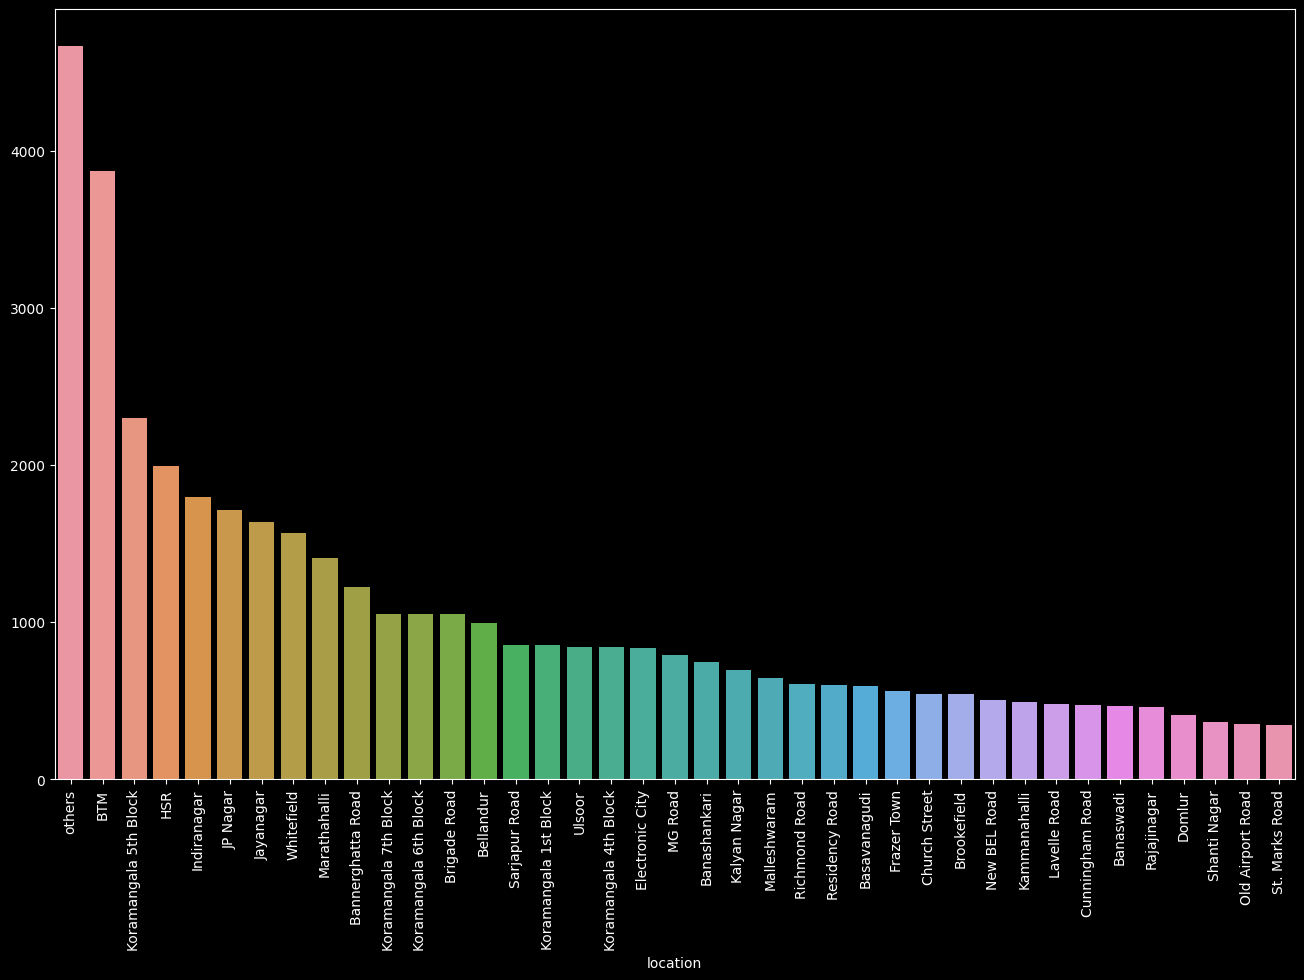

In [50]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(x=location_counts.index, y=location_counts.values)
plt.xticks(rotation=90)

# Visualizing Online Order

In [53]:
online_order_counts = df["online_order"].value_counts()
online_order_counts

online_order
Yes    27046
No     14144
Name: count, dtype: int64

In [56]:
df["online_order"]

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51709     No
51711     No
51712     No
51715     No
51716     No
Name: online_order, Length: 41190, dtype: object

In [ ]:
data_df = sns.load_dataset('tips')

<Axes: xlabel='online_order', ylabel='count'>

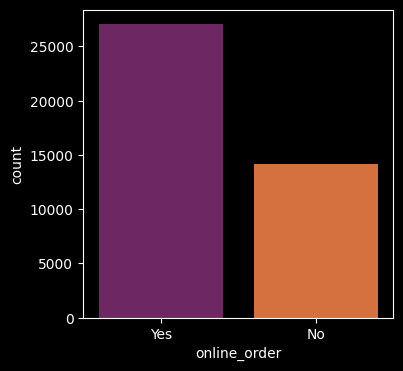

In [61]:
plt.figure(figsize=(4, 4))
sns.countplot(x="online_order", data=df, palette="inferno")

# Visualizing Book Table

<Axes: xlabel='book_table', ylabel='count'>

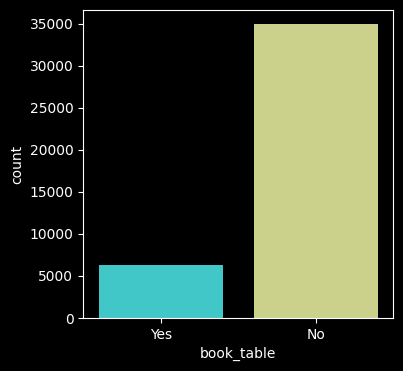

In [63]:
plt.figure(figsize= (4,4))
sns.countplot(x="book_table", data=df, palette="rainbow")

# Visualizing Online Order vs Rate

<Axes: xlabel='online_order', ylabel='rate'>

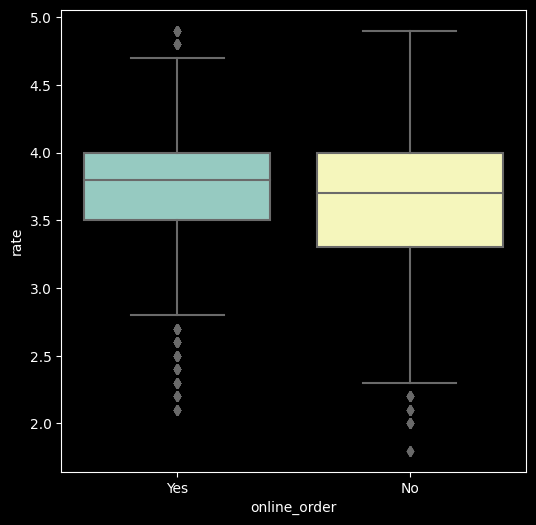

In [64]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order", y="rate", data=df)

# Visualizing Book Table vs Rate

<Axes: xlabel='book_table', ylabel='rate'>

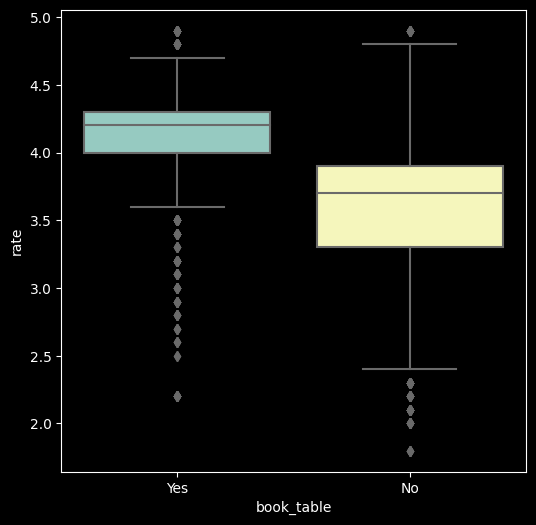

In [65]:
plt.figure(figsize=(6,6))
sns.boxplot(x="book_table", y="rate", data=df)

### Conclusion: Restaurants that have the option to book a table are most likely to have higher ratings.

# Visualizing Online Order Facility, Location Wise

In [67]:
df1 = df.groupby(["location","online_order"])["name"].count()
df1.to_csv("location_online.csv")
df1 = pd.read_csv("location_online.csv")
df1 = pd.pivot_table(df1, values=None, index=["location"], columns=["online_order"], fill_value=0, aggfunc=np.sum)
df1

/tmp/ipykernel_33/1946231269.py:4: FutureWarning: The provided callable <function sum at 0x79893838f010> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1, values=None, index=["location"], columns=["online_order"], fill_value=0, aggfunc=np.sum)


name      
online_order             No   Yes
location                         
BTM                    1016  2857
Banashankari            273   471
Banaswadi               171   292
Bannerghatta Road       396   828
Basavanagudi            183   412
Bellandur               331   665
Brigade Road            441   607
Brookefield             159   384
Church Street           212   331
Cunningham Road         156   318
Domlur                  188   218
Electronic City         364   468
Frazer Town             196   367
HSR                     334  1658
Indiranagar             539  1256
JP Nagar                560  1150
Jayanagar               402  1232
Kalyan Nagar            245   447
Kammanahalli            159   333
Koramangala 1st Block   152   699
Koramangala 4th Block   353   488
Koramangala 5th Block   770  1525
Koramangala 6th Block   408   644
Koramangala 7th Block   313   740
Lavelle Road            282   194
MG Road                 436   356
Malleshwaram            247   394
Marathahalli            446   961
New BEL Road            157   349
Old Airport Road        159   194
Rajajinagar             182   279
Residency Road          372   229
Richmond Road           378   225
Sarjapur Road           199   653
Shanti Nagar            173   193
St. Marks Road          176   167
Ulsoor                  296   547
Whitefield              612   956
others                 1708  2959

<Axes: xlabel='location'>

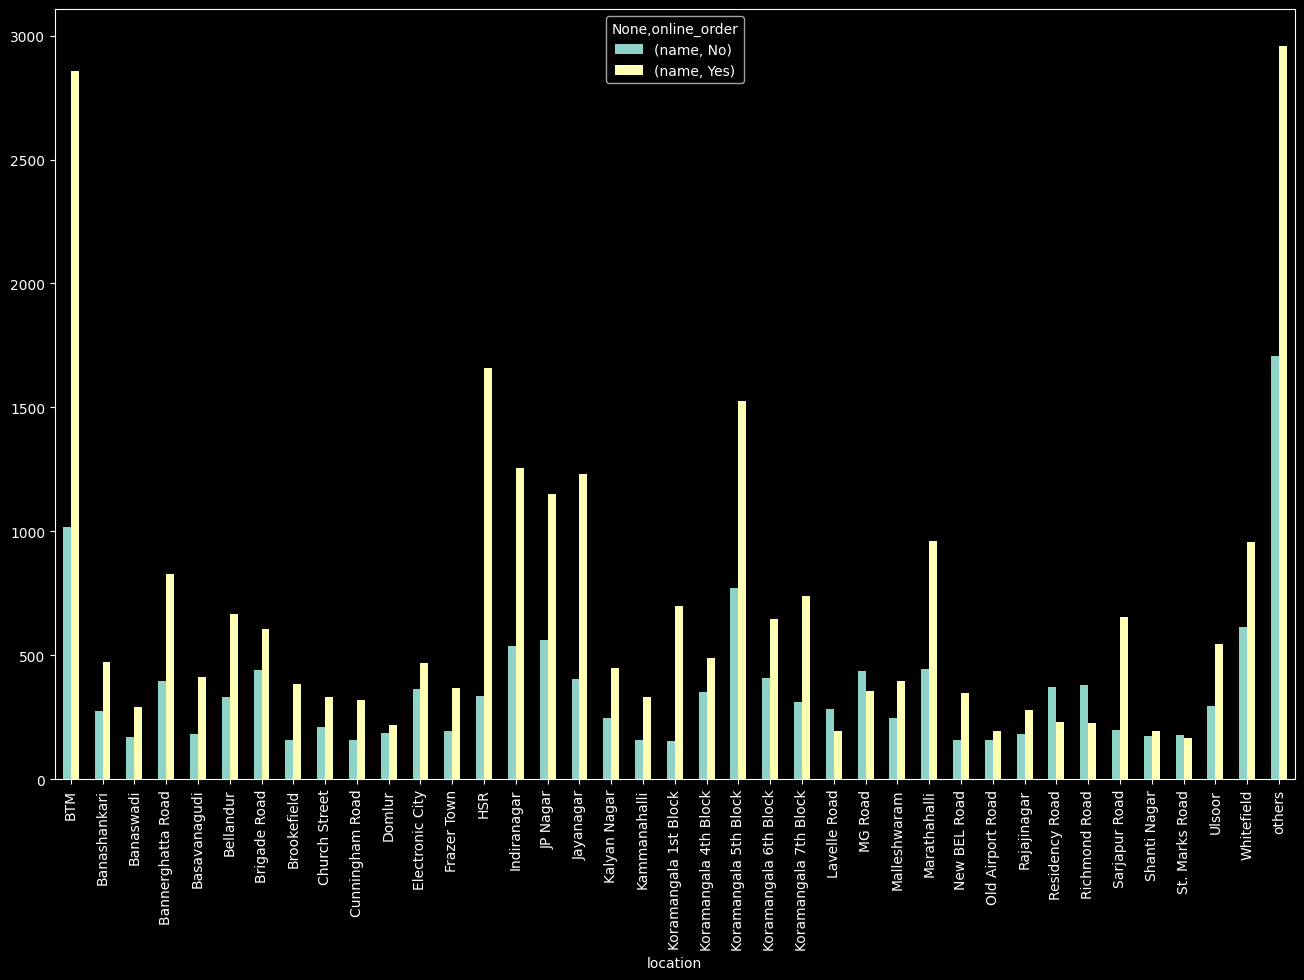

In [70]:
df1.plot(kind="bar",figsize=(16,10))

# Visualizing Book Table Facility, Location Wise

In [71]:
df2 = df.groupby(["location","book_table"])["name"].count()
df2.to_csv("location_booktable.csv")
df2 = pd.read_csv("location_booktable.csv")
df2 = pd.pivot_table(df2, values=None, index=["location"], columns=["book_table"], fill_value=0, aggfunc=np.sum)
df2

/tmp/ipykernel_33/3549531562.py:4: FutureWarning: The provided callable <function sum at 0x79893838f010> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2, values=None, index=["location"], columns=["book_table"], fill_value=0, aggfunc=np.sum)


name     
book_table               No  Yes
location                        
BTM                    3719  154
Banashankari            691   53
Banaswadi               455    8
Bannerghatta Road      1126   98
Basavanagudi            579   16
Bellandur               898   98
Brigade Road            877  171
Brookefield             471   72
Church Street           362  181
Cunningham Road         299  175
Domlur                  351   55
Electronic City         736   96
Frazer Town             555    8
HSR                    1784  208
Indiranagar            1367  428
JP Nagar               1422  288
Jayanagar              1365  269
Kalyan Nagar            549  143
Kammanahalli            443   49
Koramangala 1st Block   801   50
Koramangala 4th Block   531  310
Koramangala 5th Block  1625  670
Koramangala 6th Block   940  112
Koramangala 7th Block   891  162
Lavelle Road            248  228
MG Road                 445  347
Malleshwaram            552   89
Marathahalli           1244  163
New BEL Road            450   56
Old Airport Road        294   59
Rajajinagar             420   41
Residency Road          452  149
Richmond Road           487  116
Sarjapur Road           699  153
Shanti Nagar            309   57
St. Marks Road          219  124
Ulsoor                  666  177
Whitefield             1316  252
others                 4277  390

<Axes: xlabel='location'>

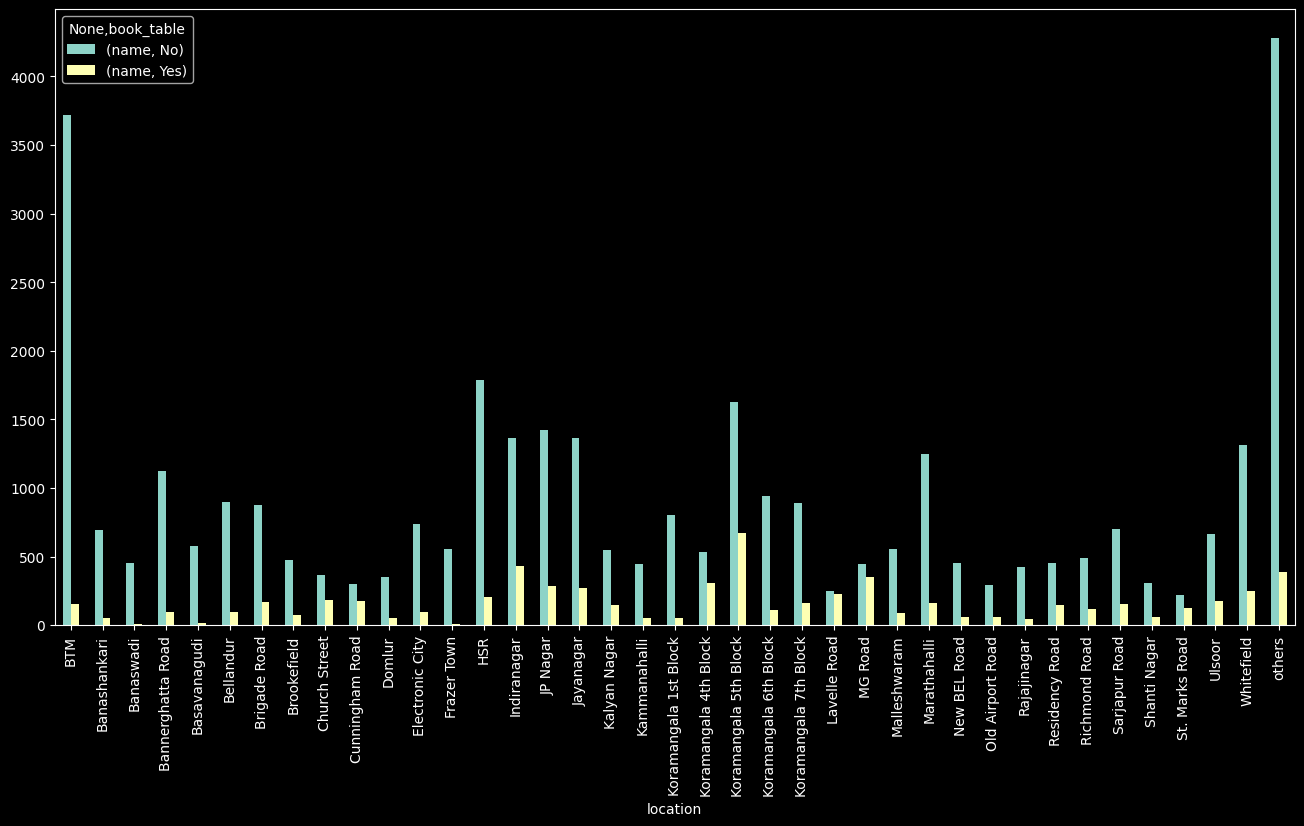

In [72]:
df2.plot(kind="bar", figsize=(16,8))

# Visualizing Types of Restaurants vs Rate

<Axes: xlabel='type', ylabel='rate'>

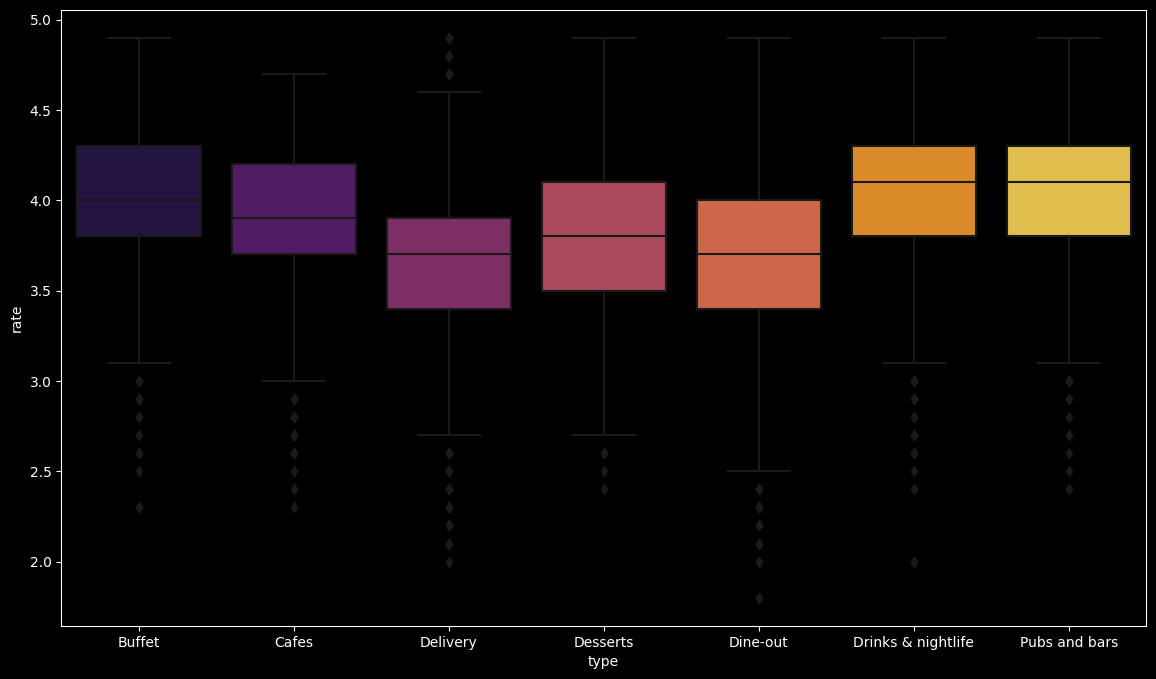

In [73]:
plt.figure(figsize=(14,8))
sns.boxplot(x="type",y="rate",data=df,palette="inferno")

# Grouping Types of Restaurants, Location Wise

In [74]:
df3 = df.groupby(["location","type"])["name"].count()
df3.to_csv("location_type.csv")
df3 = pd.read_csv("location_type.csv")
df3 = pd.pivot_table(df3, values=None, index=["location"], columns=["type"], fill_value=0, aggfunc=np.sum)
df3

/tmp/ipykernel_33/2247914151.py:4: FutureWarning: The provided callable <function sum at 0x79893838f010> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = pd.pivot_table(df3, values=None, index=["location"], columns=["type"], fill_value=0, aggfunc=np.sum)


name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       18    71     2432      125     1195   
Banashankari               7    36      347       57      284   
Banaswadi                  0    20      225       25      186   
Bannerghatta Road          9    37      639       83      445   
Basavanagudi               7    11      301       52      219   
Bellandur                 28    31      466       58      380   
Brigade Road              25    41      427       83      393   
Brookefield                6    17      277       37      202   
Church Street             19    46      185       29      213   
Cunningham Road           29    28      190       26      178   
Domlur                    15    13      218       27      110   
Electronic City           21    18      355       46      353   
Frazer Town                1    10      360       49      139   
HSR                       16    45     1350       94      458   
Indiranagar               36    92      961      124      461   
JP Nagar                  42    66      873      124      555   
Jayanagar                 24    72      904      136      486   
Kalyan Nagar               9    37      289       64      275   
Kammanahalli               2    21      260       21      182   
Koramangala 1st Block      3    21      509       41      262   
Koramangala 4th Block     21    53      359       56      260   
Koramangala 5th Block     60   146      965      200      789   
Koramangala 6th Block     18    40      467       70      383   
Koramangala 7th Block     25    44      447      102      388   
Lavelle Road              30    22      115       43      181   
MG Road                   51    76      213       56      312   
Malleshwaram              11    29      234       70      263   
Marathahalli              34    26      763       75      485   
New BEL Road               4    25      265       26      170   
Old Airport Road          12     4      159       29      128   
Rajajinagar               10     3      203       40      192   
Residency Road            20    26      154       53      267   
Richmond Road             63    16      186       50      260   
Sarjapur Road             25    14      447       70      256   
Shanti Nagar               9    18      150       29      149   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    50      375       54      309   
Whitefield                26    47      738       91      590   
others                    89   129     2487      284     1547   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   19            13  
Banashankari                          13             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         31            20  
Cunningham Road                       16             7  
Domlur                                12            11  
Electronic City                       20            19  
Frazer Town                            2             2  
HSR                                   12            17  
Indiranagar                           61            60  
JP Nagar                              44             6  
Jayanagar                             12             0  
Kalyan Nagar                          18             0  
Kammanahalli                           6             0  
Koramangala 1st Block                  

<Axes: xlabel='location'>

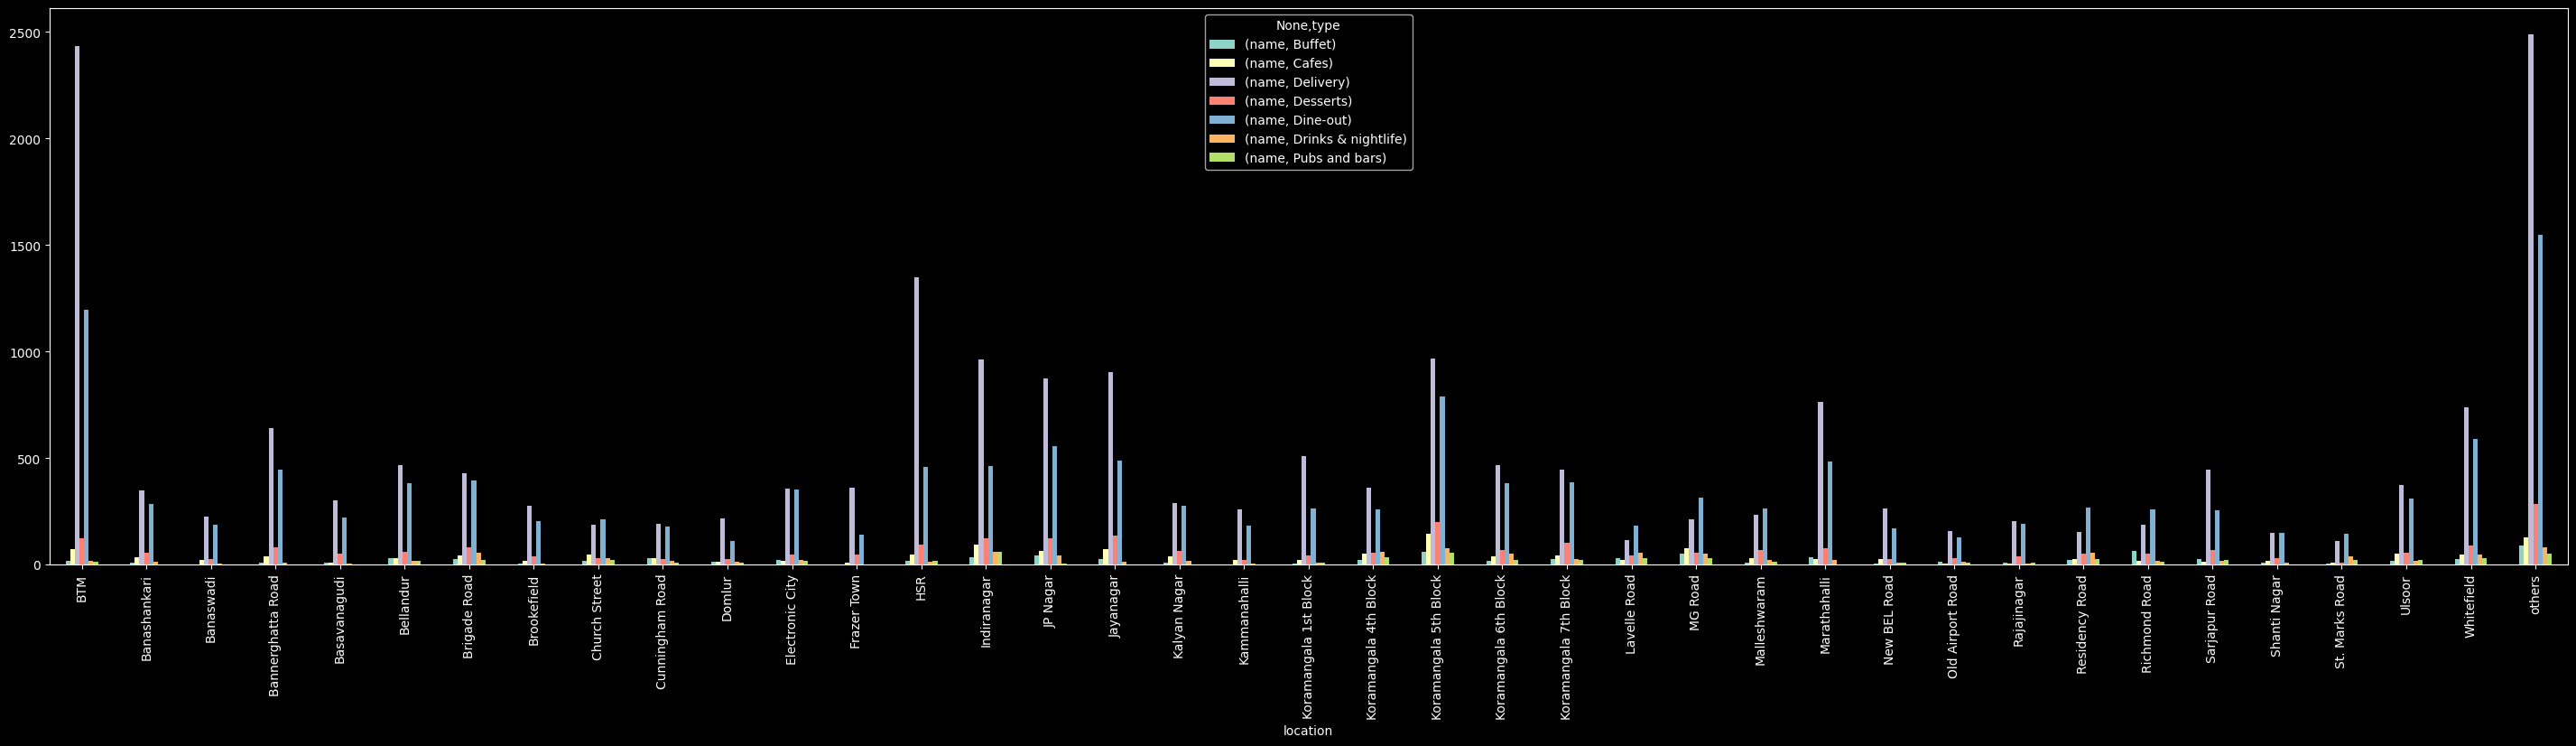

In [75]:
df3.plot(kind="bar",figsize=(36,8))

# No. of Votes, Location Wise

In [76]:
df4 = df[["location", "votes"]]
df4.drop_duplicates()
df5 = df4.groupby(["location"])["votes"].sum()
df5 = df5.to_frame()
df5 = df5.sort_values("votes",ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
others,622053
Church Street,590306


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'others'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),
  Text(26, 

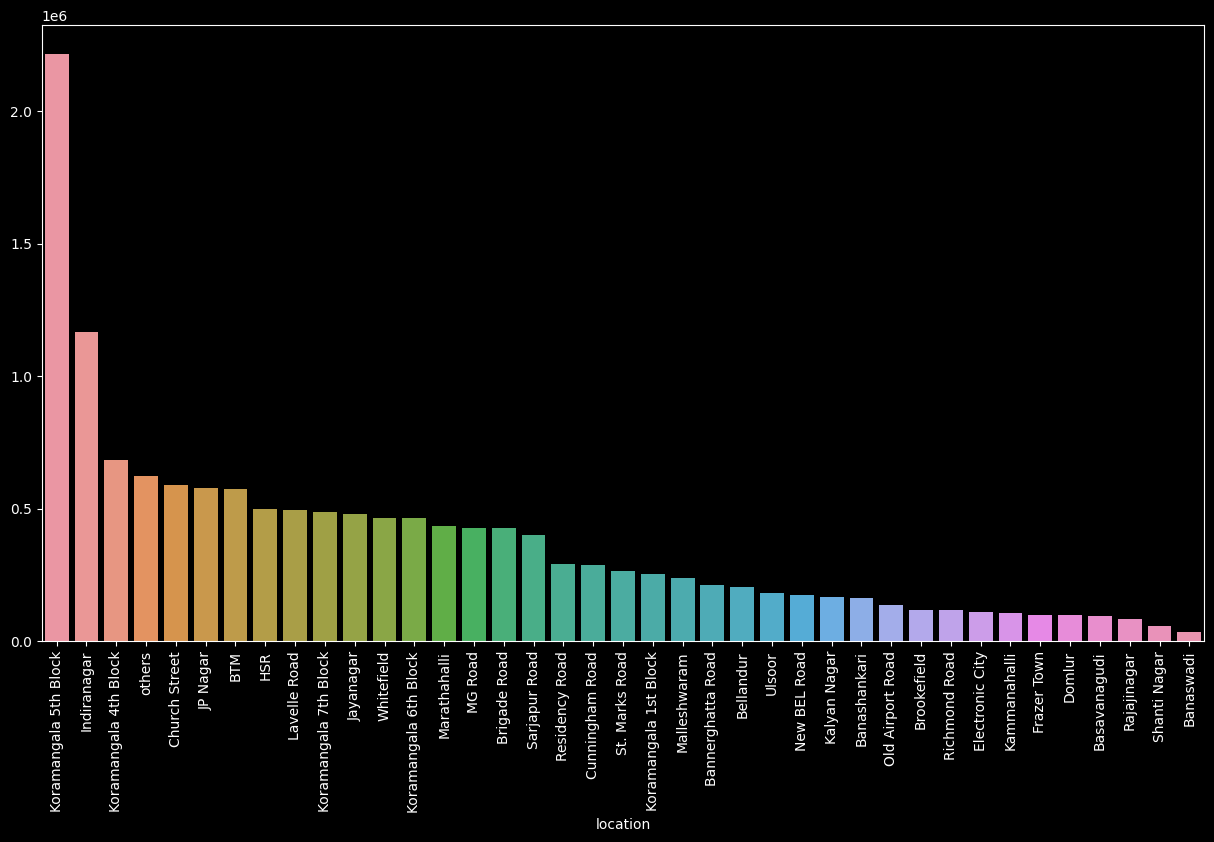

In [79]:
plt.figure(figsize=(15,8))
sns.barplot(x=df5.index, y=df5["votes"].values)
#sns.barplot(df5.index, df5["votes"])
plt.xticks(rotation = 90)

In [80]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costof2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


# Visualizing Top Cuisines

In [82]:
df6 = df[["cuisines","votes"]]
df6.drop_duplicates()
df7 = df6.groupby(["cuisines"])["votes"].sum()
df7 = df7.to_frame()
df7 = df7.sort_values("votes",ascending=False)
df7.head()

,votes
cuisines,
others,10413614
North Indian,516306
"Pizza, Cafe, Italian",347520
"North Indian, Chinese",258225
South Indian,161645


In [83]:
df7 = df7.iloc[1:,:]
df7.head()

,votes
cuisines,
North Indian,516306
"Pizza, Cafe, Italian",347520
"North Indian, Chinese",258225
South Indian,161645
"North Indian, Continental, Chinese",122751


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'Pizza, Cafe, Italian'),
  Text(2, 0, 'North Indian, Chinese'),
  Text(3, 0, 'South Indian'),
  Text(4, 0, 'North Indian, Continental, Chinese'),
  Text(5, 0, 'North Indian, Mughlai'),
  Text(6, 0, 'Chinese'),
  Text(7, 0, 'Cafe'),
  Text(8, 0, 'North Indian, South Indian'),
  Text(9, 0, 'Cafe, Continental, Italian, Burger'),
  Text(10, 0, 'Desserts'),
  Text(11, 0, 'Chinese, Momos'),
  Text(12, 0, 'Modern Indian'),
  Text(13, 0, 'Continental, North Indian'),
  Text(14, 0, 'Cafe, Continental, Italian'),
  

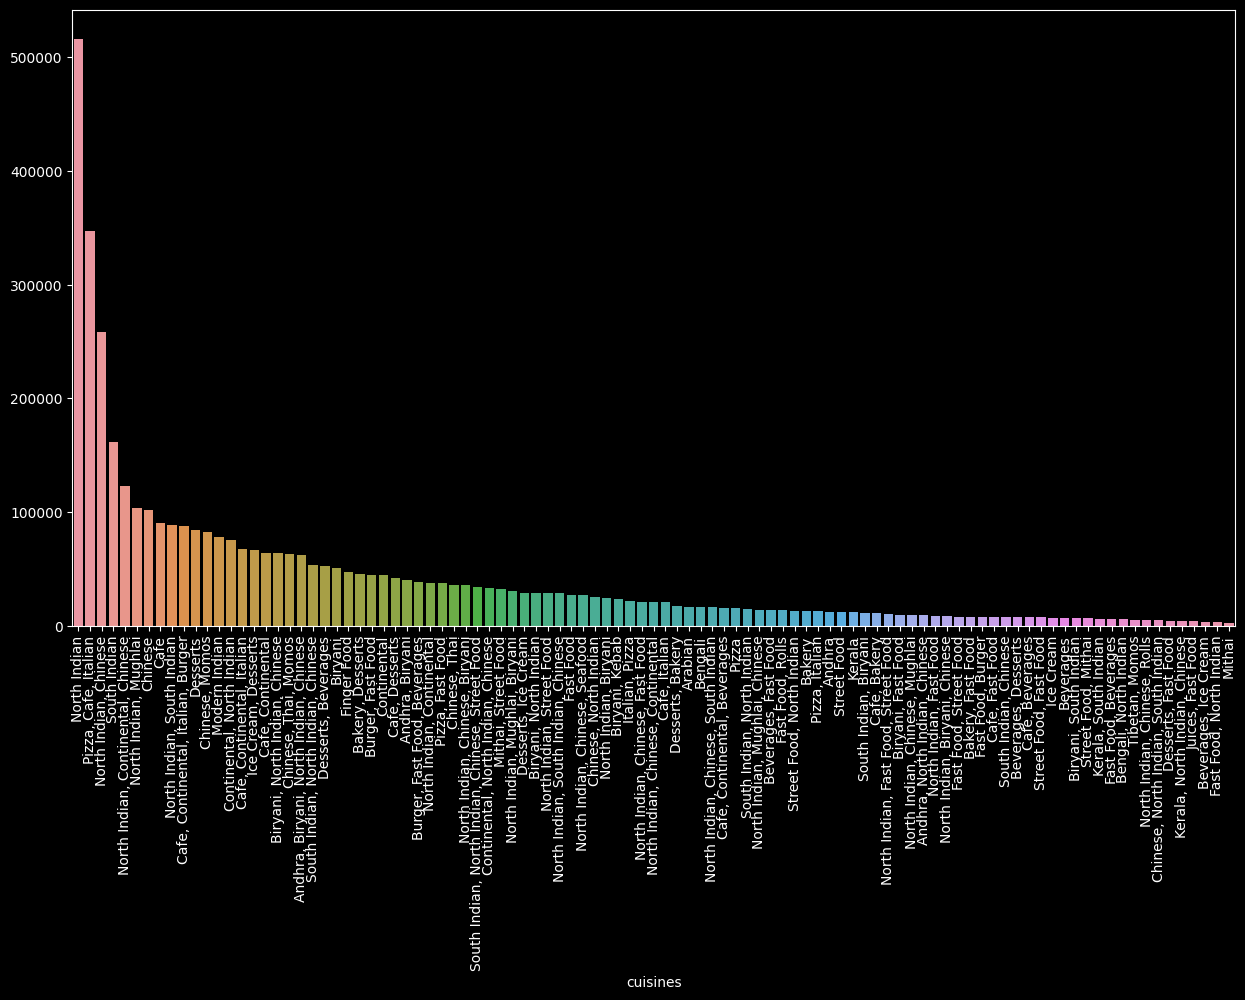

In [85]:
plt.figure(figsize = (15,8))
sns.barplot(x = df7.index, y = df7["votes"].values)
plt.xticks(rotation = 90)